In [1]:
import os
os.chdir('../')

In [2]:
from redunet import ReduNetVector
import utils_example as ue

## Hyperparameters

We first set the hyperparameters for our data:
- `data_dim`: dimension of the data
- `dataset`: choice of dataset (any option 1-8)
- `train_noise`: scale of gaussian noise added to training data
- `test_noise`: scale of gaussian noise added to testing data
- `train_samples`: number of training samples
- `test_samples`: number of testing samples

In [3]:
data_dim = 2
dataset = 1  # can be 1 to 8
train_noise = 0.1
test_noise = 0.1
train_samples = 100
test_samples = 100

Then for ReduNet:
- `num_layers`: number of layers
- `eta`: step size $\eta$
- `eps`: distortion $\epsilon^2$

In [4]:
num_layers = 200
eta = 0.5
eps = 0.1

## Data

Using `generate_2d(.)` function, we sample training and testing data from a Gaussian distribution. We also preprocess the data by normalizing them with $\ell^2$ norm. 

In [5]:
X_train, y_train, num_classes = ue.generate_2d(dataset, train_noise, train_samples) # train
X_test, y_test, num_classes = ue.generate_2d(dataset, test_noise, test_samples) # test

## Model

We then initialize our network by running `init` method, which takes in training data `X_train` and labels `y_train`. It also outputs the representations `Z_train`. While constructing, our network also computes the `total_loss`, `discrimn_loss` and `compress_loss`. Please refer to our paper for its formulation. 

In [6]:
net = ReduNetVector(num_classes, data_dim, num_layers=num_layers, eta=eta, eps=eps)
Z_train = net.init(X_train, y_train)

0 | 0.830890 2.397769 1.566879
1 | 0.859477 2.397770 1.538293
2 | 0.874584 2.397772 1.523188
3 | 0.874156 2.397774 1.523618
4 | 0.873763 2.397776 1.524013
5 | 0.873449 2.397779 1.524330
6 | 0.873269 2.397780 1.524511
7 | 0.873206 2.397782 1.524576
8 | 0.873192 2.397784 1.524592
9 | 0.873190 2.397786 1.524596
10 | 0.873191 2.397788 1.524597
11 | 0.873193 2.397789 1.524597
12 | 0.873194 2.397791 1.524597
13 | 0.873196 2.397793 1.524597
14 | 0.873198 2.397795 1.524597
15 | 0.873199 2.397796 1.524597
16 | 0.873201 2.397798 1.524597
17 | 0.873202 2.397799 1.524597
18 | 0.873204 2.397801 1.524597
19 | 0.873206 2.397803 1.524597
20 | 0.873207 2.397804 1.524597
21 | 0.873209 2.397805 1.524597
22 | 0.873210 2.397807 1.524597
23 | 0.873211 2.397809 1.524597
24 | 0.873213 2.397810 1.524597
25 | 0.873214 2.397811 1.524597
26 | 0.873216 2.397813 1.524597
27 | 0.873217 2.397814 1.524597
28 | 0.873218 2.397815 1.524597
29 | 0.873220 2.397817 1.524597
30 | 0.873221 2.397818 1.524597
31 | 0.873222 2.39

### Training

Finally, we plot our loss, inputs and outputs for visualization. 

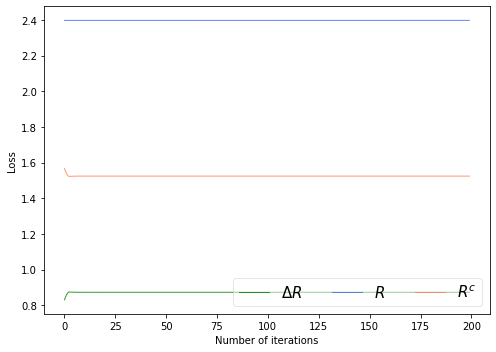

In [7]:
ue.plot_loss_mcr(net.get_loss())

Visualing our training data and representations

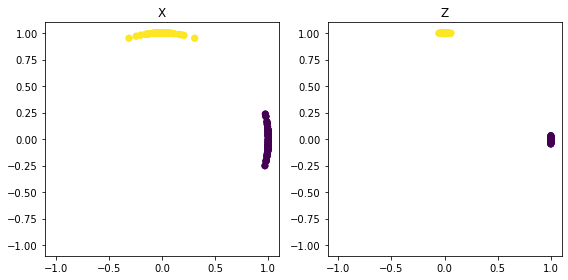

In [8]:
ue.plot_2d(X_train, y_train, Z_train) 

### Testing

Now that the network is constructed and trained, we can compute representations of our test data. 

In [9]:
Z_test = net(X_test).detach()

0 | 0.823723 2.397693 1.573970
1 | 0.857446 2.397743 1.540298
2 | 0.874537 2.397799 1.523262
3 | 0.873972 2.397736 1.523764
4 | 0.873549 2.397815 1.524266
5 | 0.873032 2.397726 1.524693
6 | 0.872881 2.397825 1.524944
7 | 0.872691 2.397725 1.525034
8 | 0.872772 2.397829 1.525057
9 | 0.872668 2.397730 1.525062
10 | 0.872769 2.397832 1.525063
11 | 0.872670 2.397734 1.525064
12 | 0.872771 2.397835 1.525063
13 | 0.872674 2.397738 1.525064
14 | 0.872774 2.397837 1.525064
15 | 0.872679 2.397742 1.525064
16 | 0.872776 2.397840 1.525064
17 | 0.872683 2.397746 1.525064
18 | 0.872779 2.397842 1.525064
19 | 0.872687 2.397750 1.525064
20 | 0.872781 2.397844 1.525064
21 | 0.872691 2.397754 1.525064
22 | 0.872783 2.397847 1.525064
23 | 0.872694 2.397758 1.525063
24 | 0.872785 2.397849 1.525064
25 | 0.872698 2.397761 1.525064
26 | 0.872787 2.397851 1.525064
27 | 0.872701 2.397765 1.525064
28 | 0.872789 2.397853 1.525064
29 | 0.872705 2.397768 1.525064
30 | 0.872791 2.397855 1.525064
31 | 0.872708 2.39

And visualize its loss and outputs.

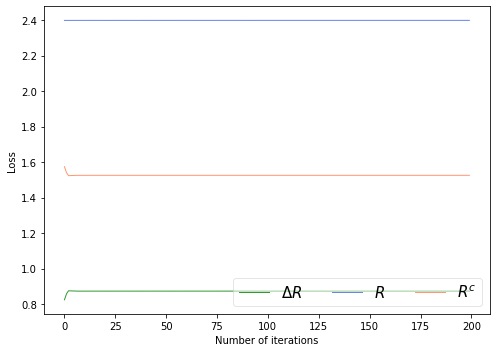

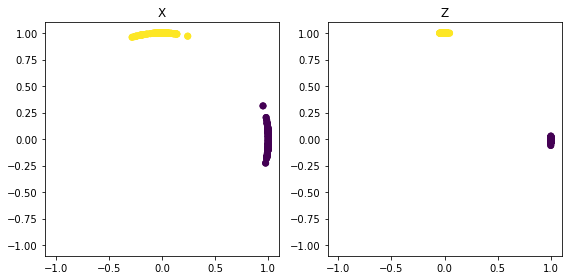

In [10]:
ue.plot_loss_mcr(net.get_loss())
ue.plot_2d(X_test, y_test, Z_test)